In [ ]:
# https://www.tensorflow.org/tutorials/keras/regression
# https://stackoverflow.com/questions/66584769/converting-binary-categorical-variable-to-0s-and-1s
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import exp

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import regularizers

In [ ]:
train_data = pd.read_csv("archive/exoTrain.csv")

train_data["LABEL"]-=1 #subtracts 1 from labels to turn it into binary
train_data.tail()

train_features = train_data.copy()
train_labels = train_data.pop("LABEL")
train_labels.tail()

test_data =  pd.read_csv("archive/exoTest.csv")
test_data["LABEL"]-=1
test_data.tail()

test_features = test_data.copy()
test_labels = test_data.pop("LABEL")
test_labels.tail()

565    0
566    0
567    0
568    0
569    0
Name: LABEL, dtype: int64

In [ ]:
#normalization layer
normalizer = preprocessing.Normalization(input_shape=[3198,], axis=None)
normalizer.adapt(np.array(train_features))

In [ ]:
#model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1,
    kernel_regularizer=regularizers.l1_l2(l1=1e-6, l2=1e-6)
    )
])

linear_model.summary()

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.00001),
    loss='mean_squared_error'
    )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 3198)              3         
_________________________________________________________________
dense (Dense)                (None, 1)                 3199      
Total params: 3,202
Trainable params: 3,199
Non-trainable params: 3
_________________________________________________________________


Epoch 1/40
128/128 [==============================] - 1s 8ms/step - loss: 2.8647 - val_loss: 0.8298
Epoch 2/40
128/128 [==============================] - 0s 2ms/step - loss: 3.1961 - val_loss: 0.8206
Epoch 3/40
128/128 [==============================] - 0s 2ms/step - loss: 1.2761 - val_loss: 0.8152
Epoch 4/40
128/128 [==============================] - 0s 2ms/step - loss: 1.0341 - val_loss: 0.8115
Epoch 5/40
128/128 [==============================] - 0s 3ms/step - loss: 0.4916 - val_loss: 0.8195
Epoch 6/40
128/128 [==============================] - 0s 2ms/step - loss: 0.4585 - val_loss: 0.7905
Epoch 7/40
128/128 [==============================] - 0s 2ms/step - loss: 1.2277 - val_loss: 0.7992
Epoch 8/40
128/128 [==============================] - 0s 3ms/step - loss: 0.5974 - val_loss: 0.7974
Epoch 9/40
128/128 [==============================] - 0s 2ms/step - loss: 0.3389 - val_loss: 0.7970
Epoch 10/40
128/128 [==============================] - 0s 2ms/step - loss: 0.3038 - val_loss: 0.7904

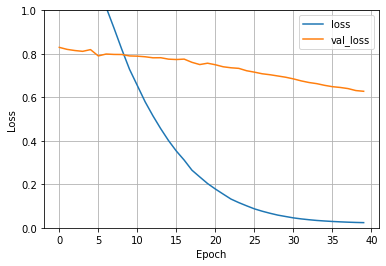

In [ ]:
history = linear_model.fit(
    train_features, train_labels,
    epochs=40,
    # suppress logging
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [ ]:
print("Test loss:", linear_model.evaluate( test_features, test_labels, verbose=0))

output_y = linear_model.predict(test_features)

output_p = []
for planet in output_y:
   lt = (1 / (1 + exp(-planet))) #sigmoid function
   if( lt >.5):
        output_p.append(1)
   else: 
        output_p.append(0)

counter = 0
for i in range(len(test_labels)):
    if(test_labels[i] == output_p[i]):
        counter+=1
print("Accuracy probability: ", (counter/ len(test_labels)) * 100, "%")
print("Confusion Matrix", tf.math.confusion_matrix(test_labels, output_p))

Test loss: 0.17484839260578156
Accuracy probability:  10.701754385964913 %
Confusion Matrix tf.Tensor(
[[ 58 507]
 [  2   3]], shape=(2, 2), dtype=int32)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c58af11-5d4f-40f3-a808-e868f2c28485' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>